<!-- (d_access_osm)= -->

----------------

```{admonition} Learning Objectives
- Download and utilize OpenStreetMap data
```
```{admonition} Review
* [Understanding CRS codes](d_understand_crs_codes.md)
* [Creating Points, Lines, Polygons](c_new_vectors.md)
```
----------------

# Accessing OSM Data in Python

## What is OpenStreetMap?

OpenStreetMap (OSM) is a global collaborative (crowd-sourced) dataset and project that aims at creating a free editable map of the world containing a lot of information about our environment [^gpd_clip]. It contains data for example about streets, buildings, different services, and landuse to mention a few. You can view the map at www.openstreetmap.org. You can also sign up as a contributor if you want to edit the map. More details about OpenStreetMap and its contents are available in the [OpenStreetMap Wiki](https://wiki.openstreetmap.org/wiki/Main_Page).

## OSMnx

This week we will explore a Python module called [OSMnx](https://github.com/gboeing/osmnx)
that can be used to retrieve, construct, analyze, and visualize street networks from OpenStreetMap, and also retrieve data about Points of Interest such as restaurants, schools, and lots of different kind of services. It is also easy to conduct network routing based on walking, cycling or driving by combining OSMnx functionalities with a package called [NetworkX](https://networkx.github.io/documentation/stable/).

To get an overview of the capabilities of the package, see an introductory video given by the lead developer of the package, Prof. Geoff Boeing: ["Meet the developer: Introduction to OSMnx package by Geoff Boeing"](https://www.youtube.com/watch?v=Q0uxu25ddc4&list=PLs9D4XVqc6dCAhhvhZB7aHGD8fCeCC_6N).

## Download and visualize OpenStreetMap data with OSMnx

One the most useful features that OSMnx provides is an easy-to-use way of retrieving [OpenStreetMap](http://www.openstreetmap.org) data (using [OverPass API](http://wiki.openstreetmap.org/wiki/Overpass_API)).

In this tutorial, we will learn how to download and visualize OSM data covering a specified area of interest: the neighborhood of Edgewood in Washington DC USA.

In [1]:
# Specify the name that is used to seach for the data
place_name = "Edgewood Washington, DC, USA"

### OSM Location Boundary

Let's also plot the Polygon that represents the boundary of our area of interest (Washington DC). We can retrieve the Polygon geometry using the `ox.geocode_to_gdf` [docs](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=geocode_to_gdf(#osmnx.geocoder.geocode_to_gdf) function.

In [2]:
# import osmnx
import osmnx as ox
import geopandas as gpd

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

As the name of the function already tells us, `gdf_from_place()`returns a GeoDataFrame based on the specified place name query.

In [3]:
# Check the data type
area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((-77.00892 38.92123, -77.00890 38.920...",38.934159,38.917008,-76.99358,-77.008915,282956700,relation,4634158,38.922613,-77.000537,"Edgewood, Washington, District of Columbia, Un...",place,neighbourhood,0.47


Let's still verify the data type:

In [4]:
# Check the data type
type(area)

geopandas.geodataframe.GeoDataFrame

Finally, let's plot it.

<Axes: >

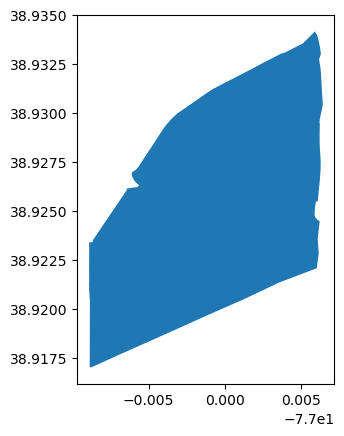

In [5]:
area.plot()

### OSM Building footprints

It is also possible to retrieve other types of OSM data features with OSMnx such as buildings or points of interest (POIs). Let's download the buildings with `ox.geometries_from_place` [docs](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=geometries_from_place#osmnx.geometries.geometries_from_place) function and plot them on top of our street network in Kamppi. 


When fetching spesific types of geometries from OpenStreetMap using OSMnx `geometries_from_place` we also need to specify the correct tags. For getting [all types of buildings](https://wiki.openstreetmap.org/wiki/Buildings), we can use the tag `building=yes`.

In [6]:
# List key-value pairs for tags
tags = {'building': True}   

buildings = ox.geometries_from_place(place_name, tags)
buildings.head()

addr:state amenity building  ele gnis:county_id  \
element_type osmid                                                       
node         358955022         DC  school      yes   60            001   
             367143640         DC     NaN      yes   56            NaN   
way          52291432         NaN     NaN      yes  NaN            NaN   
             55321503         NaN     NaN      yes  NaN            NaN   
             55321504          DC     NaN      yes  NaN            NaN   

                            gnis:county_name gnis:created gnis:edited  \
element_type osmid                                                      
node         358955022  District of Columbia   12/18/1979  01/22/2008   
             367143640  District of Columbia          NaN         NaN   
way          52291432                    NaN          NaN         NaN   
             55321503                    NaN          NaN         NaN   
             55321504                    NaN          NaN         NaN   

                       gnis:feature_id                      gnis:import_uuid  \
element_type osmid                                                             
node         358955022         2062869  57871b70-0100-4405-bb30-88b2e001a944   
             367143640         2110453  57871b70-0100-4405-bb30-88b2e001a944   
way          52291432              NaN                                   NaN   
             55321503              NaN                                   NaN   
             55321504              NaN                                   NaN   

                        ... shop denomination old_name  url wikidata office  \
element_type osmid      ...                                                   
node         358955022  ...  NaN          NaN      NaN  NaN      NaN    NaN   
             367143640  ...  NaN          NaN      NaN  NaN      NaN    NaN   
way          52291432   ...  NaN          NaN      NaN  NaN      NaN    NaN   
             55321503   ...  NaN          NaN      NaN  NaN      NaN    NaN   
             55321504   ...  NaN          NaN      NaN  NaN      NaN    NaN   

                       short_name shelter_type ways type  
element_type osmid                                        
node         358955022        NaN          NaN  NaN  NaN  
             367143640        NaN          NaN  NaN  NaN  
way          52291432         NaN          NaN  NaN  NaN  
             55321503         NaN          NaN  NaN  NaN  
             55321504         NaN          NaN  NaN  NaN  

[5 rows x 55 columns]

We can plot the footprints quickly.

<Axes: >

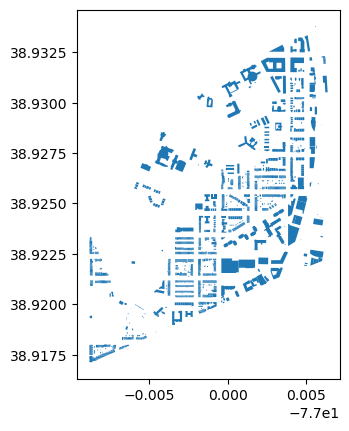

In [7]:
# Plot footprints 
buildings.plot()

### OSM Write Features to .shp
Now let's assume we want to access this data outside of python, or have a permanent copy of our building footprints for Edgewood. 

Since these objects are already `geopandas.GeoDataFrame` it's easy to save them to disk. We simply use `gpd.to_file` [docs](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_file.html).

```{Important}
We can't write OSM GeoDataFrames directly to disk because they contain field types (like lists) that can't be saved in .shp or .geojsons etc. Instead lets isolate only the attributes we are interested in, **including geometry** which is required. 
```

We need to isolate just the attributes we are interested in:

In [8]:
buildings  = buildings.loc[:,buildings.columns.str.contains('addr:|geometry')]

```{Important}
OSM data often contains multiple feature types like mixing points with polygons. This is a problem when we try to write it to disk.
```
We also need to isolate the feature type we are looking for [e.g. Multipolygon, Polygon, Point]. Since here we want building footprints we are going to keep only polygons.

In [9]:
buildings = buildings.loc[buildings.geometry.type=='Polygon']

Now, finally, we can write it to disk.

In [10]:
# Save footprints 
buildings.to_file('../temp/edgewood_buildings.shp')  
# Or save in a more open source format
#buildings.to_file('../temp/edgewood_buildings.geojson', driver='GeoJSON')  

/tmp/ipykernel_341623/2776310115.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  buildings.to_file('../temp/edgewood_buildings.shp')


Sources
[^gpd_clip]: [automating-gis-processes](https://automating-gis-processes.github.io/2017/lessons/L3/nearest-neighbour.html)